# Como compilar e configurar o OpenCV/DNN com suporte a GPU e CUDA 

Antes de tudo, é necessário ter instalado os  drivers pra CUDA, CUDA Toolkit, e o cuDNN. No Colab isso já está tudo devidamente configurado e pronto para uso, portanto esse aviso é somente para caso queira fazer os comandos abaixo em sua própria máquina (os comandos são os mesmos caso queira executá-los em seu computador, basta apenas remover o `!` no início dos comandos, pois esse caractere é usado no Colab apenas)

O primeiro passo é instalar todas as dependências necessárias para o processo de compilação e configuração

In [ ]:
!sudo apt-get update
!sudo apt-get upgrade

In [ ]:
!sudo apt-get install build-essential cmake unzip pkg-config
!sudo apt-get install libjpeg-dev libpng-dev libtiff-dev
!sudo apt-get install libavcodec-dev libavformat-dev libswscale-dev
!sudo apt-get install libv4l-dev libxvidcore-dev libx264-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
pkg-config is already the newest version (0.29.1-0ubuntu2).
unzip is already the newest version (6.0-21ubuntu1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
libpng-dev is already the newest version (1.6.34-1ubuntu0.18.04.2).
libtiff-dev is already the newest version (4.0.9-5ubuntu0.3).
libtiff-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libavcodec-dev is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
libavcode

In [ ]:
!sudo apt-get install libgtk-3-dev
!sudo apt-get install libatlas-base-dev gfortran
!sudo apt-get install python3-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  autoconf automake autopoint autotools-dev debhelper dh-autoreconf
  dh-strip-nondeterminism file gettext gettext-base gir1.2-atk-1.0
  gir1.2-atspi-2.0 gir1.2-freedesktop gir1.2-gdkpixbuf-2.0 gir1.2-gtk-3.0
  gir1.2-pango-1.0 intltool-debian libarchive-cpio-perl libarchive-zip-perl
  libatk-bridge2.0-dev libatk1.0-dev libatspi2.0-dev
  libcairo-script-interpreter2 libcairo2-dev libdbus-1-dev libepoxy-dev
  libfile-stripnondeterminism-perl libgdk-pixbuf2.0-dev libmagic-mgc libmagic1
  libmail-sendmail-perl libpango1.0-dev libpangoxft-1.0-0 libpixman-1-dev
  libsigsegv2 libsys-hostname-long-perl libtimedate-perl libtool
  libxcb-shm0-dev libxcomposite-dev libxcursor-dev libxinerama-dev
  libxkbcommon-dev libxrandr-dev libxtst-dev m4 po-debconf wayland-protocols
  x11proto-composite-dev x11proto-randr-dev x11proto-record-dev
  x11proto-xine

Agora iremos baixar o código fonte do OpenCV. Escolheremos a versão 4.2, que já possui suporte para CUDA/GPU.
Precisamos fazer isso pois não há uma versão do OpenCV com suporte a GPU que esteja disponível pra baixar usando os comandos pip (não é possível, pelo menos até o momento atual)

In [ ]:
!cd ~
!wget -O opencv.zip https://github.com/opencv/opencv/archive/4.2.0.zip
!wget -O opencv_contrib.zip https://github.com/opencv/opencv_contrib/archive/4.2.0.zip
!unzip opencv.zip
!unzip opencv_contrib.zip
!mv opencv-4.2.0 opencv
!mv opencv_contrib-4.2.0 opencv_contrib

Streaming output truncated to the last 5000 lines.
  inflating: opencv-4.2.0/modules/video/perf/perf_disflow.cpp  
  inflating: opencv-4.2.0/modules/video/perf/perf_ecc.cpp  
  inflating: opencv-4.2.0/modules/video/perf/perf_main.cpp  
  inflating: opencv-4.2.0/modules/video/perf/perf_optflowpyrlk.cpp  
  inflating: opencv-4.2.0/modules/video/perf/perf_precomp.hpp  
  inflating: opencv-4.2.0/modules/video/perf/perf_variational_refinement.cpp  
   creating: opencv-4.2.0/modules/video/src/
  inflating: opencv-4.2.0/modules/video/src/bgfg_KNN.cpp  
  inflating: opencv-4.2.0/modules/video/src/bgfg_gaussmix2.cpp  
  inflating: opencv-4.2.0/modules/video/src/camshift.cpp  
  inflating: opencv-4.2.0/modules/video/src/dis_flow.cpp  
  inflating: opencv-4.2.0/modules/video/src/ecc.cpp  
  inflating: opencv-4.2.0/modules/video/src/kalman.cpp  
  inflating: opencv-4.2.0/modules/video/src/lkpyramid.cpp  
  inflating: opencv-4.2.0/modules/video/src/lkpyramid.hpp  
   creating: opencv-4.2.0/modules/

In [ ]:
#!wget https://bootstrap.pypa.io/get-pip.py
#!sudo python3 get-pip.py

In [ ]:
#!sudo pip install virtualenv virtualenvwrapper
#!sudo rm -rf ~/get-pip.py ~/.cache/pip

In [ ]:
!apt-get install vim

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgpm2 vim-common vim-runtime xxd
Suggested packages:
  gpm ctags vim-doc vim-scripts
The following NEW packages will be installed:
  libgpm2 vim vim-common vim-runtime xxd
0 upgraded, 5 newly installed, 0 to remove and 21 not upgraded.
Need to get 6,724 kB of archives.
After this operation, 32.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 xxd amd64 2:8.0.1453-1ubuntu1.3 [49.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim-common all 2:8.0.1453-1ubuntu1.3 [70.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgpm2 amd64 1.20.7-5 [15.1 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim-runtime all 2:8.0.1453-1ubuntu1.3 [5,436 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim amd64 2:8.0.1453

In [ ]:
#!vim ~/.bashrc

In [ ]:
#!echo "export WORKON_HOME=$HOME/.virtualenvs" ~/.bashrc
#!echo "export VIRTUALENVWRAPPER_PYTHON=/usr/bin/python3" ~/.bashrc
#!echo "source /usr/local/bin/virtualenvwrapper.sh" ~/.bashrc

export WORKON_HOME=/root/.virtualenvs /root/.bashrc
export VIRTUALENVWRAPPER_PYTHON=/usr/bin/python3 /root/.bashrc
source /usr/local/bin/virtualenvwrapper.sh /root/.bashrc


In [ ]:
ls

opencv/  opencv_contrib/  opencv_contrib.zip  opencv.zip  sample_data/


In [ ]:
#!source ~/.bashrc

In [ ]:
#!mkvirtualenv opencv_cuda -p python3

In [ ]:
!pip install numpy

## Determinar a versão da arquitetura CUDA
Ao compilar o módulo DNN do OpenCV com suporte à NVIDIA GPU, precisamos determinar a versão da arquitetura da nossa GPU NVIDIA.
Este número de versão vai ser necessário quando definirmos a variável CUDA_ARCH_BIN no comando cmake na próxima etapa.
* Essa versão da arquitetura da GPU NVIDIA depende de qual GPU você está usando, portanto é necessário saber seu modelo de GPU com antecedência.
* Caso essa versão seja fornecida errada (ou seja, se não for a versão da GPU que você estiver usando) pode até não dar erro na compilação porém vai dar erro mais tarde ao utilizá-lo para realizar a detecção.
* Portanto, verifique com cuidado qual é a versão correta

A maneira mais simples de ver qual a arquitetura e modelo da GPU é utilizando o comando `nvidia-smi`

In [ ]:
!nvidia-smi

Wed Apr 29 23:45:44 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

Visualizando essa tabela podemos ver o modelo da nossa GPU. Antes de continuar precisamos ver qual é a versão para esse modelo. Essa versão é o valor que vamos definir em **CUDA_ARCH_BIN**, e para isso precisamos acessar o site da nvidia (https://developer.nvidia.com/cuda-gpus) e ver em "CUDA-Enabled Tesla Products" o valor das arquiteturas. Guarde esse valor pois iremos utilizá-lo na etapa seguinte.

**Obs:** atualmente o Opencv (até a atual versão)  suporta apenas a partir da 5.3. A GPU Tesla K80 por exemplo (3.7) não é atualmente suportado pelo módulo dnn do OpenCV.
* Caso o Colab tenha escolhido essa GPU para você recomendamos  esperar um pouco até o Colab resetar o runtime e escolher outra GPU, ou se você tiver pressa pode forçar isso acessando `"Runtime > Factory reset runtime"`. Se ao fazer isso a GPU não mudar então é necessário esperar alguns minutos, escolher "Restart runtime" antes e fazer novamente (pois o Colab atribui a GPU de modo aleatório, ou com base na quanto você já utilizou). 
* Se você utilizar muito o GPU do Colab (e por muito tempo) então é provavel que o sistema deles vai detectar que está sendo usado muito e na próxima vez irá escolher pra você as GPUs mais "comuns" do Colab (que ainda são boas, porém como vimos a K80 não tem suporte pro módulo DNN do OpenCV - pelo menos até o momento). Portanto, recomendamos usar GPU ao invés da CPU apenas quando necessário mesmo (ou seja, mais para quando tiver treinando o modelo ou quando tiver fazendo a detecção em videos por exemplo). 

## Realizando as configurações para o OpenCV suportar GPU
Agora iremos configurar o build com o comando `cmake`. O comando `cmake` escaneia por dependências, configura a build e gera os arquivos necessários para o comando `make` funcionar (comando que irá fazer a compilação do OpenCV)

Primeiro vamos acessar o diretório "opencv" e em seguida criar dentro dele uma pasta chamada "build"

In [ ]:
!ls

opencv	opencv_contrib	opencv_contrib.zip  opencv.zip	sample_data


In [ ]:
%cd opencv

/content/opencv


In [ ]:
!mkdir build
%cd build

/content/opencv/build


Agora podemos rodar o comando cmake. Certifique-se que estejam habilitados as opções para CUDA, cuDNN e para o módulo DNN (WITH_CUDA, WITH_CUDNN, e OPENCV_DNN_CUDA - respectivamente). Além disso, por motivos de otimização, foram habilitadas as opções ENABLE_FAST_MATH, CUDA_FAST_MATH, e WITH_CUBLAS. O mais importante a se atentar abaixo é a variável CUDA_ARCH_BIN, certifique-se que o valor esteja correto com base em sua GPU.

In [ ]:
# valor do CUDA_ARCH_BIN = ver site nvidia

!cmake -D CMAKE_BUILD_TYPE=RELEASE \
	-D CMAKE_INSTALL_PREFIX=/usr/local \
	-D INSTALL_PYTHON_EXAMPLES=ON \
	-D INSTALL_C_EXAMPLES=OFF \
	-D OPENCV_ENABLE_NONFREE=ON \
	-D WITH_CUDA=ON \
	-D WITH_CUDNN=ON \
	-D OPENCV_DNN_CUDA=ON \
	-D ENABLE_FAST_MATH=1 \
	-D CUDA_FAST_MATH=1 \
	-D CUDA_ARCH_BIN=6.0 \
	-D WITH_CUBLAS=1 \
	-D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
	-D HAVE_opencv_python3=ON \
	-D BUILD_EXAMPLES=ON ..

-- The CXX compiler identification is GNU 7.5.0
-- The C compiler identification is GNU 7.5.0
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Detected processor: x86_64
-- Found PythonInterp: /usr/bin/python2.7 (found suitable version "2.7.17", minimum required is "2.7") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython2.7.so (found suitable exact version "2.7.17") 
-- Found PythonInterp: /usr/bin/python3 (found suitable version "3.6.9", minimum required is "3.2") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.6m.so (fo

In [ ]:
!cmake 

Usage

  cmake [options] <path-to-source>
  cmake [options] <path-to-existing-build>

Specify a source directory to (re-)generate a build system for it in the
current working directory.  Specify an existing build directory to
re-generate its build system.

Run 'cmake --help' for more information.



In [ ]:
#%cd ~/opencv_contrib

In [ ]:
!pwd

/content/opencv/build


Execute o comando `!cat /proc/cpuinfo` para ver as informações da sua CPU

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.000
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa itlb_multihit
bogomips	: 4400.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits 

## Compilando o OpenCV
Se o comando cmake não apresentou nenhum erro então estamos pronto para fazer a compilação da biblioteca

Obs: o comando abaixo pode demorar, então caso não esteja com a essa página aberta durante esse tempo todo o Colab pode desconectar devido a inatividade (geralmente quando fica mais de 30 minutos inativo). Portanto, aperte Ctrl+Shift+I (ou F12) para abrir da janela de Inspecionar Elemento e cole o código javascript abaixo em seu console:


```
function ConnectButton(){
    console.log("Conectado"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}
setInterval(ConnectButton,60000);
```

O que esse código faz é simular o click de um botão na página a cada 10 minutos, assim não é desconectado por inatividade.


In [ ]:
!make -j1

Scanning dependencies of target libwebp
[  0%] Building C object 3rdparty/libwebp/CMakeFiles/libwebp.dir/src/dec/alpha_dec.c.o
cc1: warning: ‘-Werror=’ argument ‘-Werror=non-virtual-dtor’ is not valid for C
[  0%] Building C object 3rdparty/libwebp/CMakeFiles/libwebp.dir/src/dec/buffer_dec.c.o
cc1: warning: ‘-Werror=’ argument ‘-Werror=non-virtual-dtor’ is not valid for C
[  0%] Building C object 3rdparty/libwebp/CMakeFiles/libwebp.dir/src/dec/frame_dec.c.o
cc1: warning: ‘-Werror=’ argument ‘-Werror=non-virtual-dtor’ is not valid for C
[  0%] Building C object 3rdparty/libwebp/CMakeFiles/libwebp.dir/src/dec/idec_dec.c.o
cc1: warning: ‘-Werror=’ argument ‘-Werror=non-virtual-dtor’ is not valid for C
[  0%] Building C object 3rdparty/libwebp/CMakeFiles/libwebp.dir/src/dec/io_dec.c.o
cc1: warning: ‘-Werror=’ argument ‘-Werror=non-virtual-dtor’ is not valid for C
[  0%] Building C object 3rdparty/libwebp/CMakeFiles/libwebp.dir/src/dec/quant_dec.c.o
cc1: warning: ‘-Werror=’ argument ‘-Werro

In [ ]:
!ls

3rdparty		 cvconfig.h		     opencv_python_config.cmake
apps			 cv_cpu_config.h	     opencv_python_tests.cfg
bin			 data			     opencv_tests_config.hpp
CMakeCache.txt		 doc			     python_loader
CMakeDownloadLog.txt	 downloads		     samples
CMakeFiles		 include		     setup_vars.sh
cmake_install.cmake	 lib			     share
cmake_uninstall.cmake	 Makefile		     test-reports
CMakeVars.txt		 modules		     text_config.hpp
configured		 opencv2		     tmp
CPackConfig.cmake	 OpenCVConfig.cmake	     unix-install
CPackSourceConfig.cmake  OpenCVConfig-version.cmake  version_string.tmp
CTestTestfile.cmake	 opencv_data_config.hpp
custom_hal.hpp		 OpenCVModules.cmake


In [ ]:
!sudo apt-get install zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
zip is already the newest version (3.0-11build1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [ ]:
!pwd
%cd ../..

/content/opencv/build
/content


In [ ]:
!ls

opencv	opencv_contrib	opencv_contrib.zip  opencv.zip	sample_data


In [ ]:
#%cd ..

In [ ]:
!python -m site

sys.path = [
    '/content',
    '/env/python',
    '/usr/lib/python36.zip',
    '/usr/lib/python3.6',
    '/usr/lib/python3.6/lib-dynload',
    '/usr/local/lib/python3.6/dist-packages',
    '/usr/lib/python3/dist-packages',
]
USER_BASE: '/root/.local' (exists)
USER_SITE: '/root/.local/lib/python3.6/site-packages' (doesn't exist)
ENABLE_USER_SITE: True


In [ ]:
!ls 
!pwd

opencv	opencv_contrib	opencv_contrib.zip  opencv.zip	sample_data
/content


In [ ]:
%cd opencv/build

/content/opencv/build


Após terminar de compilar falta fazer a instalação do OpenCV, faremos utilizando o seguinte comando

In [ ]:
!sudo make install
!sudo ldconfig

-- Detected processor: x86_64
-- Looking for ccache - not found
-- Found ZLIB: /usr/lib/x86_64-linux-gnu/libz.so (found suitable version "1.2.11", minimum required is "1.2.3") 
-- Could NOT find Jasper (missing: JASPER_LIBRARIES JASPER_INCLUDE_DIR) 
-- Found ZLIB: /usr/lib/x86_64-linux-gnu/libz.so (found version "1.2.11") 
-- found Intel IPP (ICV version): 2019.0.0 [2019.0.0 Gold]
-- at: /content/opencv/build/3rdparty/ippicv/ippicv_lnx/icv
-- found Intel IPP Integration Wrappers sources: 2019.0.0
-- at: /content/opencv/build/3rdparty/ippicv/ippicv_lnx/iw
-- CUDA detected: 10.1
-- CUDA NVCC target flags: -gencode;arch=compute_60,code=sm_60;-D_FORCE_INLINES
-- Could not find OpenBLAS include. Turning OpenBLAS_FOUND off
-- Could not find OpenBLAS lib. Turning OpenBLAS_FOUND off
-- Could NOT find Atlas (missing: Atlas_CLAPACK_INCLUDE_DIR) 
-- A library with LAPACK API found.
-- Could NOT find JNI (missing: JAVA_AWT_INCLUDE_PATH) 
-- Could NOT find Pylint (missing: PYLINT_EXECUTABLE) 
-- Co

Pronto, agora após terminar é recomendado voltar ao diretório principal (/content) onde estão nossos arquivos

In [ ]:
!pwd

/content/opencv/build


In [ ]:
%cd ../..

/content


# Conectando com o Drive e Importação das bibliotecas

Agora que terminamos vamos fazer um teste real, só vamos antes conectar com o Drive pois vai ser necessário para copiar os arquivos do modelo 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Abaixo troque pelo diretório onde está a pasta do Drive que você está salvando seus arquivos do YOLO

In [ ]:
diretorio = '/content/gdrive/My Drive/Cursos/YOLO/';

Também vamos importar as outras bibliotecas necessárias para executar a detecção e outros procedimentos que veremos abaixo

In [ ]:
import numpy as np
import time
import os
import matplotlib.pyplot as plt 
import zipfile

# Parte 2 - Testando o OpenCV com suporte a GPU

Agora que concluímos o processo de configuração e instalação do OpenCV podemos fazer o teste. Primeiramente, faça o import da biblioteca

In [ ]:
import cv2
print(cv2.__version__)

4.2.0


A primeira forma de verificar que deu certo é observando a versão que é retornada ao executar o `print(cv2.__version__)`. Deve aparecer 4.2.0 (ou a versão que você baixou para compilar)

Vamos extrair os arquivos do modelo (.weights, yolov3.cfg e coco.names) para o diretório principal do Colab

In [ ]:
path = diretorio + "modelo_YOLO.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./")

Carrega do disco o arquivo com o detector YOLO treinado com o dataset COCO (80 classes)

In [ ]:
# Carrega os labels (nomes) das classes do COCO dataset, que o modelo padrão do YOLO foi treinado
labelsPath = os.path.sep.join(['/content/', "coco.names"])
LABELS = open(labelsPath).read().strip().split("\n")

# Define o caminho para os pesos YOLO do modelo treinado e para o arquivo que possui as configurações do modelo
weightsPath = os.path.sep.join(['/content/', "yolov3.weights"])
configPath = os.path.sep.join(['/content/', "yolov3.cfg"])

net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

Agora sim podemos verificar que a instalação do OpenCV com suporte a GPU/CUDA funcionou como deveria. Caso o comando abaixo fosse executado sem suporte iria dar erro. Se não ao rodar não mostrou nenhuma mensagem então significa que está tudo ok.

In [ ]:
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)

# Parte 3 - Fazendo um teste de detecção

##  Definindo mais configurações para a detecção

In [ ]:
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")

#print(COLORS)

In [ ]:
ln = net.getLayerNames() # obtem a lista com os nomes de todas as camadas

print("Todas as camadas (layers):")
print(ln)
print("Total: "+ str(len(ln)))
print("Camadas de saída: ")
print(net.getUnconnectedOutLayers())

# todas as camadas de saída que precisamo são obtidas com a função `net.getUnconnectedOutLayers()`
# podemos manter apenas essas camadas com o comando abaixo
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
print(ln)

Todas as camadas (layers):
['conv_0', 'bn_0', 'relu_1', 'conv_1', 'bn_1', 'relu_2', 'conv_2', 'bn_2', 'relu_3', 'conv_3', 'bn_3', 'relu_4', 'shortcut_4', 'conv_5', 'bn_5', 'relu_6', 'conv_6', 'bn_6', 'relu_7', 'conv_7', 'bn_7', 'relu_8', 'shortcut_8', 'conv_9', 'bn_9', 'relu_10', 'conv_10', 'bn_10', 'relu_11', 'shortcut_11', 'conv_12', 'bn_12', 'relu_13', 'conv_13', 'bn_13', 'relu_14', 'conv_14', 'bn_14', 'relu_15', 'shortcut_15', 'conv_16', 'bn_16', 'relu_17', 'conv_17', 'bn_17', 'relu_18', 'shortcut_18', 'conv_19', 'bn_19', 'relu_20', 'conv_20', 'bn_20', 'relu_21', 'shortcut_21', 'conv_22', 'bn_22', 'relu_23', 'conv_23', 'bn_23', 'relu_24', 'shortcut_24', 'conv_25', 'bn_25', 'relu_26', 'conv_26', 'bn_26', 'relu_27', 'shortcut_27', 'conv_28', 'bn_28', 'relu_29', 'conv_29', 'bn_29', 'relu_30', 'shortcut_30', 'conv_31', 'bn_31', 'relu_32', 'conv_32', 'bn_32', 'relu_33', 'shortcut_33', 'conv_34', 'bn_34', 'relu_35', 'conv_35', 'bn_35', 'relu_36', 'shortcut_36', 'conv_37', 'bn_37', 'relu_

## Criando as funções para detecção

### Função para exibir imagens no Colab

In [ ]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(16, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

### Construindo o blob da imagem

In [ ]:
def blob_imagem(net, imagem, mostrar_texto=True):
  # tempo exato logo antes de iniciar o processamento da imagem e predição
  inicio = time.time() 

  # constroi o blob da imagem de entrada
  blob = cv2.dnn.blobFromImage(imagem, 1 / 255.0, (416, 416), swapRB=True, crop=False)
  # parâmetros: 
  # - imagem de entrada, que queremos pré-processar antes de passar para a rede 
  # - fator de escala, tamanho que será redimensionado
  # - tamanho que a rede neural espera
  # - swapRB: deixamos =True para inverter os canais RGB (pois OpenCV trabalha com BGR)
  # - crop: controla se parte da imagem será cortada para encaixar no tamanho. 
  #         Se =False não irá cortar, mantendo a proporção

  # passa o blob da imagem como entrada da rede
  net.setInput(blob)

  # realiza a predição e obtem os resultados
  layerOutputs = net.forward(ln)

  # tempo exato logo após terminar o processamento
  termino = time.time()

  if mostrar_texto:
    # Com uma subtração simples obtemos o tempo que o YOLO levou para realizar a detecção (chamado de inference time)
    print("YOLO levou {:.2f} segundos".format(termino - inicio))

  return net, imagem, layerOutputs

### Realizando a detecção

In [ ]:
def deteccoes(detection, _confianca, caixas, confiancas, IDclasses, mostrar_texto=True):

  # extrai o ID da classe e a confiança (isto é, a probabilidade) da detecção atual
  # agora vamos obter os scores para cada classe (no caso do COCO são 80, por isso 80 valores)
  # ou seja, cada um desses valores corresponde à probabilidade de ser o objeto
  scores = detection[5:]        # para acessar os valores das detecções usamos [5:] 
  classeID = np.argmax(scores)  # ID da classe da detecção com maior score (o mais provável)
  confianca = scores[classeID]  # retorna a confiança, ao acessar o valor

  # filtra as predições fracas, garantindo que a probabilidade 
  # da predição é maior que a probabilidade minima aceitavel
  if confianca > _confianca:

      if mostrar_texto:
        print("scores: " + str(scores))
        print("classe mais provavel: " + str(classeID))
        print("confianca: "+ str(confianca))
      
      # redimensiona as coordenadas da caixa de detecção relativo ao tamanho da imagem
      # Obs: o YOLO na verdade retorna as coordenadas (x, y) do centro da caixa
      # seguido pelo valor da largura e altura
      caixa = detection[0:4] * np.array([W, H, W, H])
      
      (centerX, centerY, width, height) = caixa.astype("int")
      #print(centerX, centerY, width, height)
      
      # usa as coordenadas (x, y) do centro para encontrar o topo e o canto esquerdo da caixa de seleção
      # vamos usar essas coordenadas para desenhar o retangulo ao redor do objeto na imagem
      x = int(centerX - (width / 2))
      y = int(centerY - (height / 2))

      # atualiza a lista de coordenadas da caixa de detecção, confianças e IDs de classes 
      caixas.append([x, y, int(width), int(height)])
      confiancas.append(float(confianca))
      IDclasses.append(classeID)
      
  return caixas, confiancas, IDclasses
    

### Mostrando o resultado da detecção na imagem (caixa delimitadora)

In [ ]:
def funcoes_imagem(imagem, i, confiancas, caixas, COLORS, LABELS, mostrar_texto=True):
  
  # extrai as coordenadas da caixa de detecção
  (x, y) = (caixas[i][0], caixas[i][1]) # coordenada (x,y) onde inicia a caixa da detecção
  (w, h) = (caixas[i][2], caixas[i][3]) # largura e altura em pixels da caixa de detecção

  # define uma cor única para a classe
  cor = [int(c) for c in COLORS[IDclasses[i]]]

  # desenha o retangulo (caixa de detecçção) ao redor do objeto, com base nas coordenadas extraídas
  cv2.rectangle(imagem, (x, y), (x + w, y + h), cor, 2) 

  # vamos colocar a confiança da predição ao lado do nome da classe
  texto = "{}: {:.4f}".format(LABELS[IDclasses[i]], confiancas[i])

  if mostrar_texto:
    print("> " + texto)
    print(x,y,w,h)
  
  # escreve acima do retangulo o label (nome) do objeto e a confiança
  cv2.putText(imagem, texto, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, cor, 2)

  return imagem,x,y,w,h

## Carregando a imagem

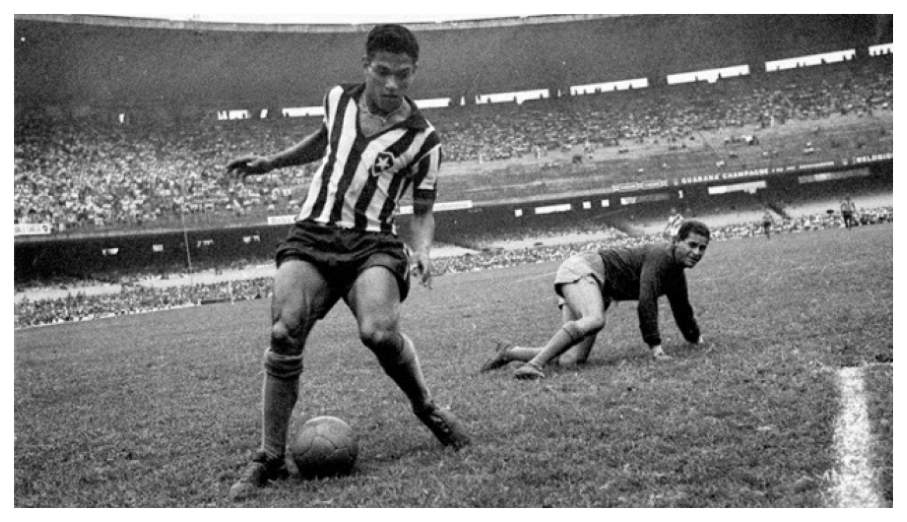

Altura: 516
Largura: 907


In [ ]:
imagem = cv2.imread("garrincha.png") 
mostrar(imagem) # exibe a imagem

# faremos uma cópia para ter salva a imagem original, apenas porque iremos modificá-la mais pra frente 
imagem_cp = imagem.copy() 

# extrai a altura e largura da imagem (com a função shape, que mostra a forma da matriz que corresponde à imagem)
(H, W) = imagem.shape[:2] 
# usamos o [:2] para extrair apenas os dois primeiros valores, pois não precisaremos agora do terceiro valor
# (que corresponde ao numero de canais de cores que a imagem tem, que geralmente vai ser 3: R G B)
print("Altura: " + str(H) + "\nLargura: " + str(W))

## Definindo as variáveis

In [ ]:
_confianca = 0.5
_threshold = 0.3

## Fazendo a detecção em uma imagem e mostrando o resultado

In [ ]:
# cria blob
net, imagem, layerOutputs = blob_imagem(net, imagem)

caixas = []  
confiancas = []
IDclasses = []

YOLO levou 0.03 segundos


In [ ]:
# percorre cada uma das camadas de saída retornadas pela rede após a predição
for output in layerOutputs:
    # percorre cada uma das detecções
    for detection in output:
        caixas, confiancas, IDclasses = deteccoes(detection, _confianca, caixas, confiancas, IDclasses)

# aplica supressão não-máxima (non-maxima suppression)
objs = cv2.dnn.NMSBoxes(caixas, confiancas, _confianca, _threshold)

scores: [0.99882334 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
classe mais provavel: 0
confianca: 0.99882334
scores: [0.9959208 0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.      

In [ ]:
print("Objetos detectados: " + str(len(objs)))

Objetos detectados: 3


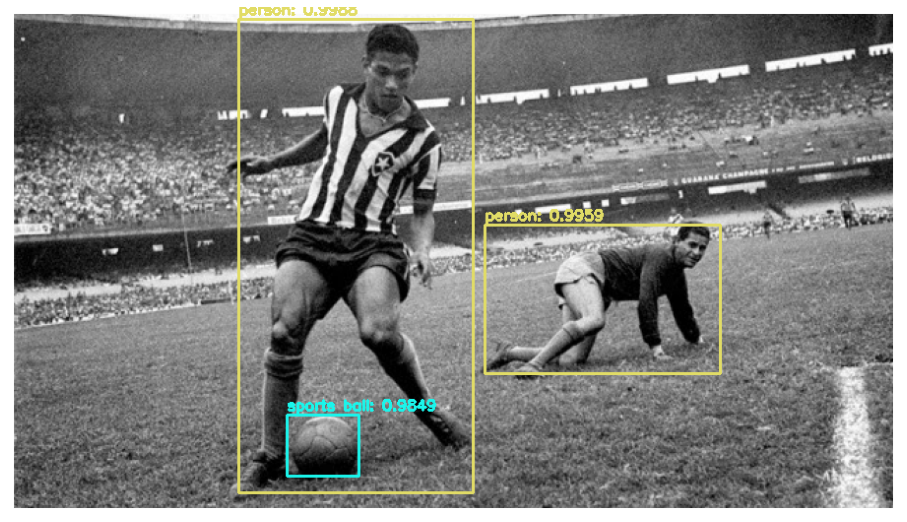

In [ ]:
if len(objs) > 0:

    # percorre os indices que estamos armazenando
    for i in objs.flatten():

        imagem, x, y, w, h = funcoes_imagem(imagem, i, confiancas, caixas, COLORS, LABELS, mostrar_texto=False)
        objeto = imagem_cp[y:y + h, x:x + w]
        #cv2_imshow(objeto)

mostrar(imagem)

# Persistência dos arquivos no Colab - Salvando as configurações

As configurações que fizemos não persistem no Google Colab, elas só vão durar até o tempo máximo que a VM do Colab permite (que é no máximo 12h). Depois disso essas configurações são perdidas. 

Essas configurações que fizemos no passo a passo para compilar o OpenCV modificam os arquivos do sistema (fora do diretório /content/), portanto não adianta apenas copiar os arquivos dentro de “/content” e depois colar eles novamente após a VM resetar o runtime.

Para que não seja necessário realizar esse processo toda vez que for usar o Colab nós pensamos em uma alternativa, que consiste em copiar todas as mudanças feitas nos arquivos da VM (que foram essenciais para a configuração do OpenCV com GPU) e usar esses arquivos para sobrescrever os arquivos padrões do Colab na próxima vez que formos usá-lo.

Copiaremos arquivos dos seguintes diretórios:
* /usr/local/share/**opencv4**
* /usr/local/include/**opencv4**
* /usr/local/**lib**/
* /usr/local/lib/**cmake**
* /usr/local/lib/python3.6/dist-packages/**cv2**
* /usr/local/**bin**


In [ ]:
%cd ../usr/local/share/
!zip -r ../../../content/usr_local_share_opencv4.zip opencv4
%cd ../../../content

In [ ]:
%cd ../usr/local/include/
!zip -r ../../../content/usr_local_include_opencv4.zip opencv4
%cd ../../../content/

In [ ]:
%cd ../usr/local/lib/python3.6/dist-packages/
!zip -r ../../../../../content/usr_local_lib_python36_dist-packages_cv2.zip cv2
%cd ../../../../../content/

In [ ]:
!find ../usr/local/lib -name "libopencv_*" -not -name "*.so" | zip -j -@ usr_local_lib_libopencv.zip 

In [ ]:
%cd ../usr/local/lib/
!zip -r ../../../content/usr_local_lib_cmake.zip cmake
%cd ../../../content/

In [ ]:
!find ../usr/local/bin -type f -name "opencv_*" -o -name "setup_vars_*" | zip -j -@ usr_local_bin.zip

Para facilitar a organização vamos colocar esses arquivos .zip dentro de um único arquivo .zip

In [ ]:
!zip -r opencv_suporte_gpu.zip usr_local_share_opencv4.zip usr_local_include_opencv4.zip usr_local_lib_python36_dist-packages_cv2.zip usr_local_lib_libopencv.zip usr_local_lib_cmake.zip usr_local_bin.zip

  adding: usr_local_share_opencv4.zip (stored 0%)
  adding: usr_local_include_opencv4.zip (stored 0%)
  adding: usr_local_lib_python36_dist-packages_cv2.zip (stored 0%)
  adding: usr_local_lib_libopencv.zip (stored 0%)
  adding: usr_local_lib_cmake.zip (stored 0%)
  adding: usr_local_bin.zip (stored 0%)


Podemos salvar diretamente esse arquivo no Drive, sem precisar baixar e enviar novamente (o que é bem mais lento)

In [ ]:
!cp opencv_suporte_gpu.zip /content/gdrive/My\ Drive/Cursos/YOLO/

Recomendamos fortemente nomear esse arquivo para um nome que identifique para qual versão de GPU foi compilada. Por exemplo, se compilamos para a Tesla P100 (cuja versão de arquitetura é 6.0) então podemos nomear como: `opencv_gpu_6.0.zip` ou `opencv_gpu_P100.zip`

Pronto, agora as configurações feitas estão salvas dentro de um único arquivo .zip. Assim fica mais fácil de extrair esses dados quando quiser rodar o OpenCV usando a GPU. Lembre-se que essa configuração foi para uma versão específica, portanto se estiver utilizando outro modelo de GPU provável que será necessário compilar novamente informando a versão correta na variável CUDA_ARCH_BIN. 

# Carregando as configurações (para testes futuros)

Abaixo será mostrado como exportar esses arquivos para os devidos diretórios. 

Esses comandos deverão ser executados antes de fazer a detecção e **antes de executar o import cv2**.

In [ ]:
path = diretorio + "opencv_suporte_gpu.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./")

In [ ]:
path = "usr_local_include_opencv4.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("../usr/local/include/")

path = "usr_local_lib_cmake.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("../usr/local/lib/")

In [ ]:
!mv "../usr/local/lib/python3.6/dist-packages/cv2" "../usr/local/lib/python3.6/dist-packages/cv2---"
path = "usr_local_lib_python36_dist-packages_cv2.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("../usr/local/lib/python3.6/dist-packages/")

path =  "usr_local_share_opencv4.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("../usr/local/share/")

In [ ]:
path = "usr_local_lib_libopencv.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("../usr/local/lib/") 

path = "usr_local_bin.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("../usr/local/bin/")

Lembre-se: se você fez o import do opencv antes de fazer a extração acima pode ser necessário resetar o Runtime para funcionar (Runtime > Restart runtime)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
print(cv2.__version__)

4.2.0


Pronto, após executar esses comandos já da pra rodar a detecção com YOLO usando OpenCV e com supore para GPU.

Obs: se você estiver executando esses códigos acima (para carregar as configurações do OpenCV) em uma nova sessão do Colab então recomendamos sempre verificar antes qual GPU está sendo usada (usando o comando `!nvidia-smi`) pois o Colab atribui de forma aleatória qual GPU é utilizada. Conforme comentado, deve ser escolhido os arquivos compilados para a versão da GPU que está sendo usada.

In [ ]:
!nvidia-smi

Thu Apr 30 10:04:02 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

Vamos só relembrar o que foi comentado antes:
* Atualmente o Opencv (até a atual versão) suporta apenas versões de arquitetura a partir da 5.3. A da GPU Tesla K80 (disponibilizada pelo Colab) é 3.7 portanto não é atualmente suportado pelo módulo dnn do OpenCV.
* Caso o Colab tenha escolhido essa GPU para você recomendamos esperar um pouco até o Colab resetar o runtime e escolher outra GPU, ou se você tiver pressa pode forçar isso acessando "Runtime > Factory reset runtime". Se ao fazer isso a GPU não mudar então é necessário esperar alguns minutos, escolher "Restart runtime" antes e fazer isso novamente (pois o Colab atribui a GPU de modo aleatório, ou com base na quanto você já utilizou).
* Se você utilizar muito o GPU do Colab (e por muito tempo) então é provavel que o sistema deles vai detectar que está sendo usado muito e na próxima vez irá escolher pra você as GPUs mais comuns do Colab (que ainda são boas, porém como vimos o caso da K80 não tem suporte pro módulo DNN do OpenCV - pelo menos até o momento). Portanto, recomendamos usar GPU ao invés da CPU apenas quando necessário mesmo (ou seja, mais para quando tiver treinando o modelo ou quando tiver fazendo a detecção em videos por exemplo).